In [56]:
import pandas as pd 

# # Load the data
# processed_hacker_track_check = pd.read_csv('/Users/muskankhandelwal/Documents/Fraud_detection/Processed_Hacker_Check.xlsx')
# unprocessed_hacker_check = pd.read_csv('/Users/muskankhandelwal/Documents/Fraud_detection/Unprocessed_Hacker_Check.xlsx')

# Load the data from Excel files
processed_hacker_track_check = pd.read_excel('/Users/muskankhandelwal/Documents/Fraud_detection/Processed_Hacker_Check.xlsx')
unprocessed_hacker_check = pd.read_excel('/Users/muskankhandelwal/Documents/Fraud_detection/Unprocessed_Hacker_Check.xlsx')


In [57]:
transactions = pd.read_csv('/Users/muskankhandelwal/Documents/Fraud_detection/Transactions.csv')
sender = pd.read_csv('/Users/muskankhandelwal/Documents/Fraud_detection/sender.csv')
receiver = pd.read_csv('/Users/muskankhandelwal/Documents/Fraud_detection/receiver.csv')
students = pd.read_csv('/Users/muskankhandelwal/Documents/Fraud_detection/Students.csv')

In [3]:
total = processed_hacker_track_check.isnull().sum().sort_values(ascending = False)
total

TID                  0
isSuspectedHacker    0
isHacker             0
dtype: int64

In [4]:
print(transactions.columns)
print(sender.columns)
print(receiver.columns)
print(students.columns)


Index(['TID', 'IdOfOrigStudent', 'IdOfDestStudent', 'transactionType',
       'hourStep', 'transaction_device', 'comments'],
      dtype='object')
Index(['oldBalanceOfOrigStudent', 'newBalanceOfOrigStudent',
       'transactionAmount', 'TID'],
      dtype='object')
Index(['oldBalanceOfDestStudent', 'newBalanceOfDestStudent',
       'transactionAmount', 'TID'],
      dtype='object')
Index(['StudentId', 'StudentName', 'StudentAge', 'StudentYear',
       'TransactionFrequency', 'NumberOfTransactionsTillDate', 'AccountType'],
      dtype='object')


In [35]:
len(students)  #123628 1761131

1761131

In [58]:
# Merge transaction data
merged_data = transactions.merge(sender, on='TID', how='left')
merged_data = merged_data.merge(receiver, on='TID', how='left')
total = merged_data.isnull().sum().sort_values(ascending = False)
total

TID                        0
IdOfOrigStudent            0
IdOfDestStudent            0
transactionType            0
hourStep                   0
transaction_device         0
comments                   0
oldBalanceOfOrigStudent    0
newBalanceOfOrigStudent    0
transactionAmount_x        0
oldBalanceOfDestStudent    0
newBalanceOfDestStudent    0
transactionAmount_y        0
dtype: int64

In [59]:
merged_data = merged_data.merge(students, left_on='IdOfOrigStudent', right_on='StudentId', how='left')
merged_data = merged_data.merge(students, left_on='IdOfDestStudent', right_on='StudentId', suffixes=('_sender', '_receiver'))


In [60]:
# Merge with processed_hacker_track_check to get the target variable
processed_data = merged_data.merge(processed_hacker_track_check, on='TID', how='inner')
unprocessed_data = merged_data.merge(unprocessed_hacker_check, on='TID', how='inner')
#transcation 
#sender
#receiver joining these values doesnt created

In [13]:
processed_data.head()

,TID,IdOfOrigStudent,IdOfDestStudent,transactionType,hourStep,transaction_device,comments,oldBalanceOfOrigStudent,newBalanceOfOrigStudent,transactionAmount_x,...,AccountType_sender,StudentId_receiver,StudentName_receiver,StudentAge_receiver,StudentYear_receiver,TransactionFrequency_receiver,NumberOfTransactionsTillDate_receiver,AccountType_receiver,isSuspectedHacker,isHacker
0,1476902,C1449172216,C639646553,cash outflow,353,ATM card,eatables,0.00,0.00,203658.18,...,JOINT/SHARED,C639646553,Student 272173,28,1,LOW,822,JOINT/SHARED,0,0
1,1958181,C1897308134,C639646553,cash inflow,544,Net Banking,drinks,743620.31,876078.72,132458.40,...,JOINT/SHARED,C639646553,Student 272173,28,1,LOW,822,JOINT/SHARED,0,0
2,1868301,C1336875098,C1698810627,cash outflow,346,Net Banking,Purchased groceries,0.00,0.00,202215.24,...,INDIVIDUAL,C1698810627,Student 902144,19,4,LOW,354,INDIVIDUAL,0,0
3,1715524,C890553378,C1271835801,cash inflow,36,Check,Purchased groceries,762393.53,957413.53,195020.00,...,NaN,C1271835801,Student 758718,14,1,MEDIUM,803,JOINT/SHARED,0,0
4,1587147,C546196803,C1271835801,cash inflow,9,ATM card,lunch,71801.00,373288.15,301487.15,...,NaN,C1271835801,Student 758718,14,1,MEDIUM,803,JOINT/SHARED,0,0


In [61]:
# Feature engineering (example)
processed_data['transaction_hour'] = processed_data['hourStep'] % 24
unprocessed_data['transaction_hour'] =  unprocessed_data['hourStep'] % 24



In [62]:
# Drop unnecessary columns
drop_columns = ['StudentName_sender', 'StudentName_receiver', 'comments', 'StudentId_sender', 'StudentId_receiver']
processed_data = processed_data.drop(columns=drop_columns)
unprocessed_data = unprocessed_data.drop(columns=drop_columns)


In [16]:
processed_data.columns

Index(['TID', 'IdOfOrigStudent', 'IdOfDestStudent', 'transactionType',
       'hourStep', 'transaction_device', 'oldBalanceOfOrigStudent',
       'newBalanceOfOrigStudent', 'transactionAmount_x',
       'oldBalanceOfDestStudent', 'newBalanceOfDestStudent',
       'transactionAmount_y', 'StudentAge_sender', 'StudentYear_sender',
       'TransactionFrequency_sender', 'NumberOfTransactionsTillDate_sender',
       'AccountType_sender', 'StudentAge_receiver', 'StudentYear_receiver',
       'TransactionFrequency_receiver',
       'NumberOfTransactionsTillDate_receiver', 'AccountType_receiver',
       'isSuspectedHacker', 'isHacker', 'transaction_hour'],
      dtype='object')

In [17]:
processed_data.head()

,TID,IdOfOrigStudent,IdOfDestStudent,transactionType,hourStep,transaction_device,oldBalanceOfOrigStudent,newBalanceOfOrigStudent,transactionAmount_x,oldBalanceOfDestStudent,...,NumberOfTransactionsTillDate_sender,AccountType_sender,StudentAge_receiver,StudentYear_receiver,TransactionFrequency_receiver,NumberOfTransactionsTillDate_receiver,AccountType_receiver,isSuspectedHacker,isHacker,transaction_hour
0,1476902,C1449172216,C639646553,cash outflow,353,ATM card,0.00,0.00,203658.18,3296742.37,...,426.0,JOINT/SHARED,28,1,LOW,822,JOINT/SHARED,0,0,17
1,1958181,C1897308134,C639646553,cash inflow,544,Net Banking,743620.31,876078.72,132458.40,3649517.23,...,388.0,JOINT/SHARED,28,1,LOW,822,JOINT/SHARED,0,0,16
2,1868301,C1336875098,C1698810627,cash outflow,346,Net Banking,0.00,0.00,202215.24,797853.30,...,582.0,INDIVIDUAL,19,4,LOW,354,INDIVIDUAL,0,0,10
3,1715524,C890553378,C1271835801,cash inflow,36,Check,762393.53,957413.53,195020.00,8121665.02,...,NaN,NaN,14,1,MEDIUM,803,JOINT/SHARED,0,0,12
4,1587147,C546196803,C1271835801,cash inflow,9,ATM card,71801.00,373288.15,301487.15,2780338.01,...,NaN,NaN,14,1,MEDIUM,803,JOINT/SHARED,0,0,9


In [18]:
processed_data.isnull().sum().sort_values(ascending = False)


StudentAge_sender                        123628
StudentYear_sender                       123628
AccountType_sender                       123628
NumberOfTransactionsTillDate_sender      123628
TransactionFrequency_sender              123628
isHacker                                      0
isSuspectedHacker                             0
AccountType_receiver                          0
NumberOfTransactionsTillDate_receiver         0
TransactionFrequency_receiver                 0
StudentYear_receiver                          0
StudentAge_receiver                           0
TID                                           0
IdOfOrigStudent                               0
transactionAmount_y                           0
newBalanceOfDestStudent                       0
oldBalanceOfDestStudent                       0
transactionAmount_x                           0
newBalanceOfOrigStudent                       0
oldBalanceOfOrigStudent                       0
transaction_device                      

In [19]:
unprocessed_data.isnull().sum().sort_values(ascending = False)

StudentAge_sender                        82301
AccountType_sender                       82301
NumberOfTransactionsTillDate_sender      82301
TransactionFrequency_sender              82301
StudentYear_sender                       82301
IdOfOrigStudent                              0
isSuspectedHacker                            0
AccountType_receiver                         0
NumberOfTransactionsTillDate_receiver        0
TransactionFrequency_receiver                0
StudentYear_receiver                         0
StudentAge_receiver                          0
TID                                          0
transactionAmount_y                          0
newBalanceOfDestStudent                      0
oldBalanceOfDestStudent                      0
transactionAmount_x                          0
newBalanceOfOrigStudent                      0
oldBalanceOfOrigStudent                      0
transaction_device                           0
hourStep                                     0
transactionTy

In [46]:
len(processed_data) # so 123628 rows out of 460818 are null, so cannot simple drop it as its 30%

460818

Adding null valyes with mean of data 

In [49]:
processed_data.dtypes

TID                                        int64
IdOfOrigStudent                           object
IdOfDestStudent                           object
transactionType                           object
hourStep                                   int64
transaction_device                        object
oldBalanceOfOrigStudent                  float64
newBalanceOfOrigStudent                  float64
transactionAmount_x                      float64
oldBalanceOfDestStudent                  float64
newBalanceOfDestStudent                  float64
transactionAmount_y                      float64
StudentAge_sender                        float64
StudentYear_sender                       float64
TransactionFrequency_sender               object
NumberOfTransactionsTillDate_sender      float64
AccountType_sender                        object
StudentAge_receiver                        int64
StudentYear_receiver                       int64
TransactionFrequency_receiver             object
NumberOfTransactions

In [63]:
# Fill missing values with the mean for numerical columns
processed_data['StudentAge_sender'] = processed_data['StudentAge_sender'].fillna(processed_data['StudentAge_sender'].mean())
processed_data['StudentYear_sender'] = processed_data['StudentYear_sender'].fillna(processed_data['StudentYear_sender'].median())
processed_data['NumberOfTransactionsTillDate_sender'] = processed_data['NumberOfTransactionsTillDate_sender'].fillna(processed_data['NumberOfTransactionsTillDate_sender'].median())

# Repeat the same for test_data
unprocessed_data['StudentAge_sender'] = unprocessed_data['StudentAge_sender'].fillna(unprocessed_data['StudentAge_sender'].mean())
unprocessed_data['StudentYear_sender'] = unprocessed_data['StudentYear_sender'].fillna(unprocessed_data['StudentYear_sender'].median())
unprocessed_data['NumberOfTransactionsTillDate_sender'] = unprocessed_data['NumberOfTransactionsTillDate_sender'].fillna(unprocessed_data['NumberOfTransactionsTillDate_sender'].median())


In [64]:
processed_data.isnull().sum().sort_values(ascending = False)

AccountType_sender                       123628
TransactionFrequency_sender              123628
TID                                           0
StudentYear_sender                            0
isHacker                                      0
isSuspectedHacker                             0
AccountType_receiver                          0
NumberOfTransactionsTillDate_receiver         0
TransactionFrequency_receiver                 0
StudentYear_receiver                          0
StudentAge_receiver                           0
NumberOfTransactionsTillDate_sender           0
StudentAge_sender                             0
IdOfOrigStudent                               0
transactionAmount_y                           0
newBalanceOfDestStudent                       0
oldBalanceOfDestStudent                       0
transactionAmount_x                           0
newBalanceOfOrigStudent                       0
oldBalanceOfOrigStudent                       0
transaction_device                      

In [65]:
# Fill missing values with the mode for categorical columns
processed_data['AccountType_sender'] = processed_data['AccountType_sender'].fillna(processed_data['AccountType_sender'].mode()[0])
processed_data['TransactionFrequency_sender'] = processed_data['TransactionFrequency_sender'].fillna(processed_data['TransactionFrequency_sender'].mode()[0])

# Repeat the same for test_data
unprocessed_data['AccountType_sender'] = unprocessed_data['AccountType_sender'].fillna(unprocessed_data['AccountType_sender'].mode()[0])
unprocessed_data['TransactionFrequency_sender'] = unprocessed_data['TransactionFrequency_sender'].fillna(unprocessed_data['TransactionFrequency_sender'].mode()[0])


In [23]:
processed_data.isnull().sum().sort_values(ascending = False)

TID                                      0
StudentYear_sender                       0
isHacker                                 0
isSuspectedHacker                        0
AccountType_receiver                     0
NumberOfTransactionsTillDate_receiver    0
TransactionFrequency_receiver            0
StudentYear_receiver                     0
StudentAge_receiver                      0
AccountType_sender                       0
NumberOfTransactionsTillDate_sender      0
TransactionFrequency_sender              0
StudentAge_sender                        0
IdOfOrigStudent                          0
transactionAmount_y                      0
newBalanceOfDestStudent                  0
oldBalanceOfDestStudent                  0
transactionAmount_x                      0
newBalanceOfOrigStudent                  0
oldBalanceOfOrigStudent                  0
transaction_device                       0
hourStep                                 0
transactionType                          0
IdOfDestStu

In [24]:
unprocessed_data.isnull().sum().sort_values(ascending = False)

TID                                      0
IdOfOrigStudent                          0
isSuspectedHacker                        0
AccountType_receiver                     0
NumberOfTransactionsTillDate_receiver    0
TransactionFrequency_receiver            0
StudentYear_receiver                     0
StudentAge_receiver                      0
AccountType_sender                       0
NumberOfTransactionsTillDate_sender      0
TransactionFrequency_sender              0
StudentYear_sender                       0
StudentAge_sender                        0
transactionAmount_y                      0
newBalanceOfDestStudent                  0
oldBalanceOfDestStudent                  0
transactionAmount_x                      0
newBalanceOfOrigStudent                  0
oldBalanceOfOrigStudent                  0
transaction_device                       0
hourStep                                 0
transactionType                          0
IdOfDestStudent                          0
transaction

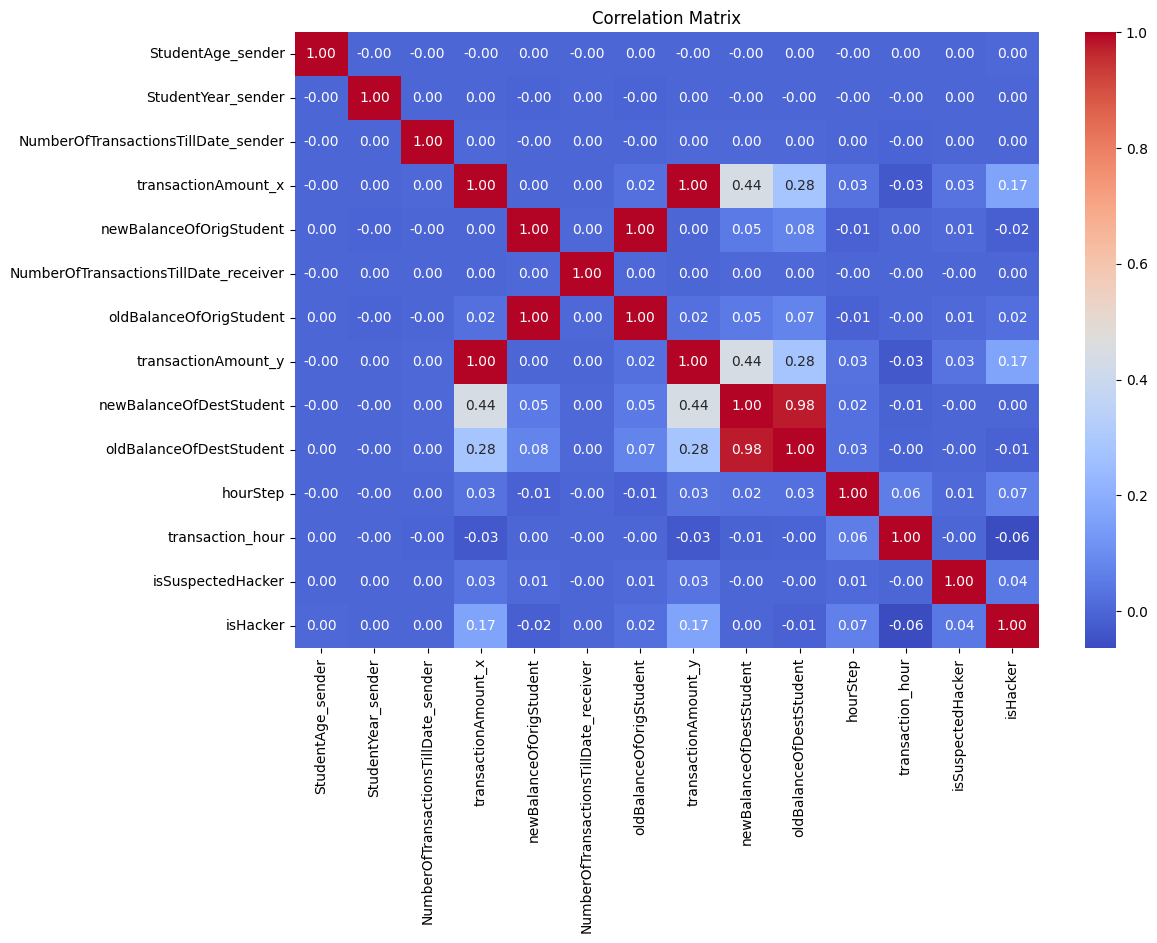

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for correlation plot
numerical_features = ['StudentAge_sender', 'StudentYear_sender', 'NumberOfTransactionsTillDate_sender',
                     'transactionAmount_x', 'newBalanceOfOrigStudent','NumberOfTransactionsTillDate_receiver',
                      'oldBalanceOfOrigStudent', 'transactionAmount_y', 'newBalanceOfDestStudent',
                      'oldBalanceOfDestStudent', 'hourStep', 'transaction_hour', 'isSuspectedHacker','isHacker']

# Compute correlation matrix
corr_matrix = processed_data[numerical_features].corr()

# Create correlation plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/var/folders/7y/xsztmydx0ps9ngnbr1tfdsq00000gn/T/ipykernel_82601/1278199731.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


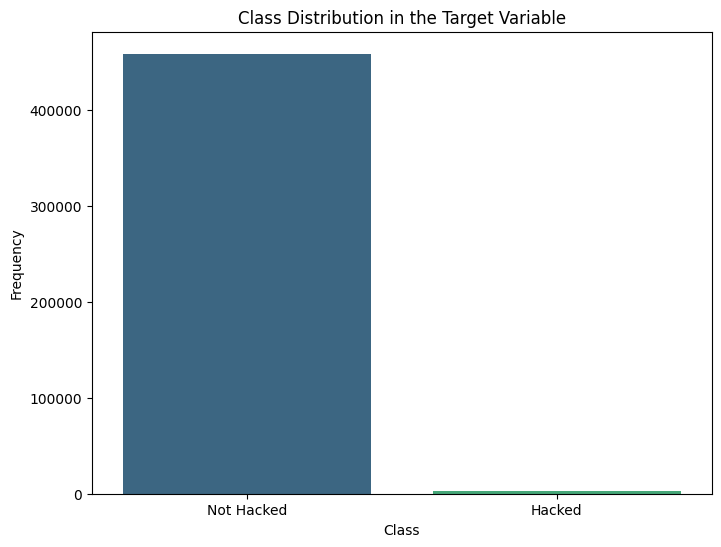

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each class in the target variable
class_counts = processed_data['isHacker'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution in the Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Not Hacked', 'Hacked'])
plt.show()


In [54]:
# Calculate the percentage of each class
class_percentage = processed_data['isHacker'].value_counts(normalize=True) * 100
print(class_percentage)


isHacker
0    99.437305
1     0.562695
Name: proportion, dtype: float64


Data is imbalanced as it can be seen from both graph and percentage

In [65]:
!pip3 install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [67]:
processed_data.describe()

,TID,hourStep,oldBalanceOfOrigStudent,newBalanceOfOrigStudent,transactionAmount_x,oldBalanceOfDestStudent,newBalanceOfDestStudent,transactionAmount_y,StudentAge_sender,StudentYear_sender,NumberOfTransactionsTillDate_sender,StudentAge_receiver,StudentYear_receiver,NumberOfTransactionsTillDate_receiver,isSuspectedHacker,isHacker,transaction_hour
count,4.608180e+05,460818.000000,4.608180e+05,4.608180e+05,4.608180e+05,4.608180e+05,4.608180e+05,4.608180e+05,460818.000000,460818.000000,460818.000000,460818.000000,460818.000000,460818.000000,460818.000000,460818.000000,460818.000000
mean,1.745331e+06,244.180909,9.124638e+05,9.320807e+05,1.727197e+05,1.048492e+06,1.155852e+06,1.727197e+05,19.504629,2.636865,498.174210,19.499701,2.501962,498.812015,0.000011,0.005627,15.302193
std,1.990398e+05,143.176933,3.011705e+06,3.041894e+06,5.940588e+05,3.357259e+06,3.617998e+06,5.940588e+05,4.927204,0.981798,247.008659,5.769742,1.118978,288.757797,0.003294,0.074802,4.373630
min,1.400834e+06,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,10.000000,1.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.572445e+06,156.000000,0.000000e+00,0.000000e+00,1.204679e+04,0.000000e+00,0.000000e+00,1.204679e+04,16.000000,2.000000,339.000000,14.000000,2.000000,248.000000,0.000000,0.000000,12.000000
50%,1.745338e+06,242.000000,1.646600e+04,0.000000e+00,6.410627e+04,8.496309e+04,1.509026e+05,6.410627e+04,19.504629,3.000000,498.000000,20.000000,3.000000,499.000000,0.000000,0.000000,16.000000
75%,1.917869e+06,345.000000,1.284222e+05,1.788516e+05,1.997190e+05,8.623576e+05,1.005941e+06,1.997190e+05,23.000000,3.000000,657.000000,25.000000,4.000000,749.000000,0.000000,0.000000,19.000000
max,2.090144e+06,743.000000,5.039905e+07,4.039905e+07,6.750076e+07,3.555534e+08,3.553814e+08,6.750076e+07,29.000000,4.000000,999.000000,29.000000,4.000000,999.000000,1.000000,1.000000,23.000000


In [70]:
processed_data.dtypes

TID                                        int64
IdOfOrigStudent                           object
IdOfDestStudent                           object
transactionType                           object
hourStep                                   int64
transaction_device                        object
oldBalanceOfOrigStudent                  float64
newBalanceOfOrigStudent                  float64
transactionAmount_x                      float64
oldBalanceOfDestStudent                  float64
newBalanceOfDestStudent                  float64
transactionAmount_y                      float64
StudentAge_sender                        float64
StudentYear_sender                       float64
TransactionFrequency_sender               object
NumberOfTransactionsTillDate_sender      float64
AccountType_sender                        object
StudentAge_receiver                        int64
StudentYear_receiver                       int64
TransactionFrequency_receiver             object
NumberOfTransactions

In [66]:
# Finding distinct values in each categorical column
transaction_type_unique = processed_data['transactionType'].unique()
transaction_device_unique = processed_data['transaction_device'].unique()
transaction_frequency_sender_unique = processed_data['TransactionFrequency_sender'].unique()
account_type_sender_unique = processed_data['AccountType_sender'].unique()
transaction_frequency_receiver_unique = processed_data['TransactionFrequency_receiver'].unique()
account_type_receiver_unique = processed_data['AccountType_receiver'].unique()

# Printing the distinct values
print("Distinct values in 'transactionType':", transaction_type_unique)
print("Distinct values in 'transaction_device':", transaction_device_unique)
print("Distinct values in 'TransactionFrequency_sender':", transaction_frequency_sender_unique)
print("Distinct values in 'AccountType_sender':", account_type_sender_unique)
print("Distinct values in 'TransactionFrequency_receiver':", transaction_frequency_receiver_unique)
print("Distinct values in 'AccountType_receiver':", account_type_receiver_unique)


Distinct values in 'transactionType': ['cash outflow' 'cash inflow' 'money transfer' 'money payment'
 'debit to acct']
Distinct values in 'transaction_device': ['ATM card' 'Net Banking' 'Check' 'UPI']
Distinct values in 'TransactionFrequency_sender': ['LOW' 'HIGH' 'MEDIUM']
Distinct values in 'AccountType_sender': ['JOINT/SHARED' 'INDIVIDUAL']
Distinct values in 'TransactionFrequency_receiver': ['LOW' 'MEDIUM' 'HIGH']
Distinct values in 'AccountType_receiver': ['JOINT/SHARED' 'INDIVIDUAL']


Encoding Methods
Based on the analysis, here are the  encoding methods for each categorical variable:

**One-Hot Encoding for Non-Ordinal Categories:**
1. transactionType
2. transaction_device
3. AccountType_sender
4. AccountType_receiver

**Label Encoding for Ordinal Categories:**

1. TransactionFrequency_sender
2. TransactionFrequency_receiver

In [67]:
# One-hot encoding for non-ordinal categories
processed_data = pd.get_dummies(processed_data, columns=[
    'transactionType', 
    'transaction_device', 
    'AccountType_sender', 
    'AccountType_receiver'
], drop_first=True)


In [68]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for ordinal categories
label_encoders = {}
for column in ['TransactionFrequency_sender', 'TransactionFrequency_receiver']:
    le = LabelEncoder()
    processed_data[column] = le.fit_transform(processed_data[column])
    label_encoders[column] = le

# To reverse the encoding later if needed:
# original_values = label_encoders['TransactionFrequency_sender'].inverse_transform(train_data['TransactionFrequency_sender'])


In [33]:
processed_data.columns

Index(['TID', 'IdOfOrigStudent', 'IdOfDestStudent', 'hourStep',
       'oldBalanceOfOrigStudent', 'newBalanceOfOrigStudent',
       'transactionAmount_x', 'oldBalanceOfDestStudent',
       'newBalanceOfDestStudent', 'transactionAmount_y', 'StudentAge_sender',
       'StudentYear_sender', 'TransactionFrequency_sender',
       'NumberOfTransactionsTillDate_sender', 'StudentAge_receiver',
       'StudentYear_receiver', 'TransactionFrequency_receiver',
       'NumberOfTransactionsTillDate_receiver', 'isSuspectedHacker',
       'isHacker', 'transaction_hour', 'transactionType_cash outflow',
       'transactionType_debit to acct', 'transactionType_money payment',
       'transactionType_money transfer', 'transaction_device_Check',
       'transaction_device_Net Banking', 'transaction_device_UPI',
       'AccountType_sender_JOINT/SHARED', 'AccountType_receiver_JOINT/SHARED'],
      dtype='object')

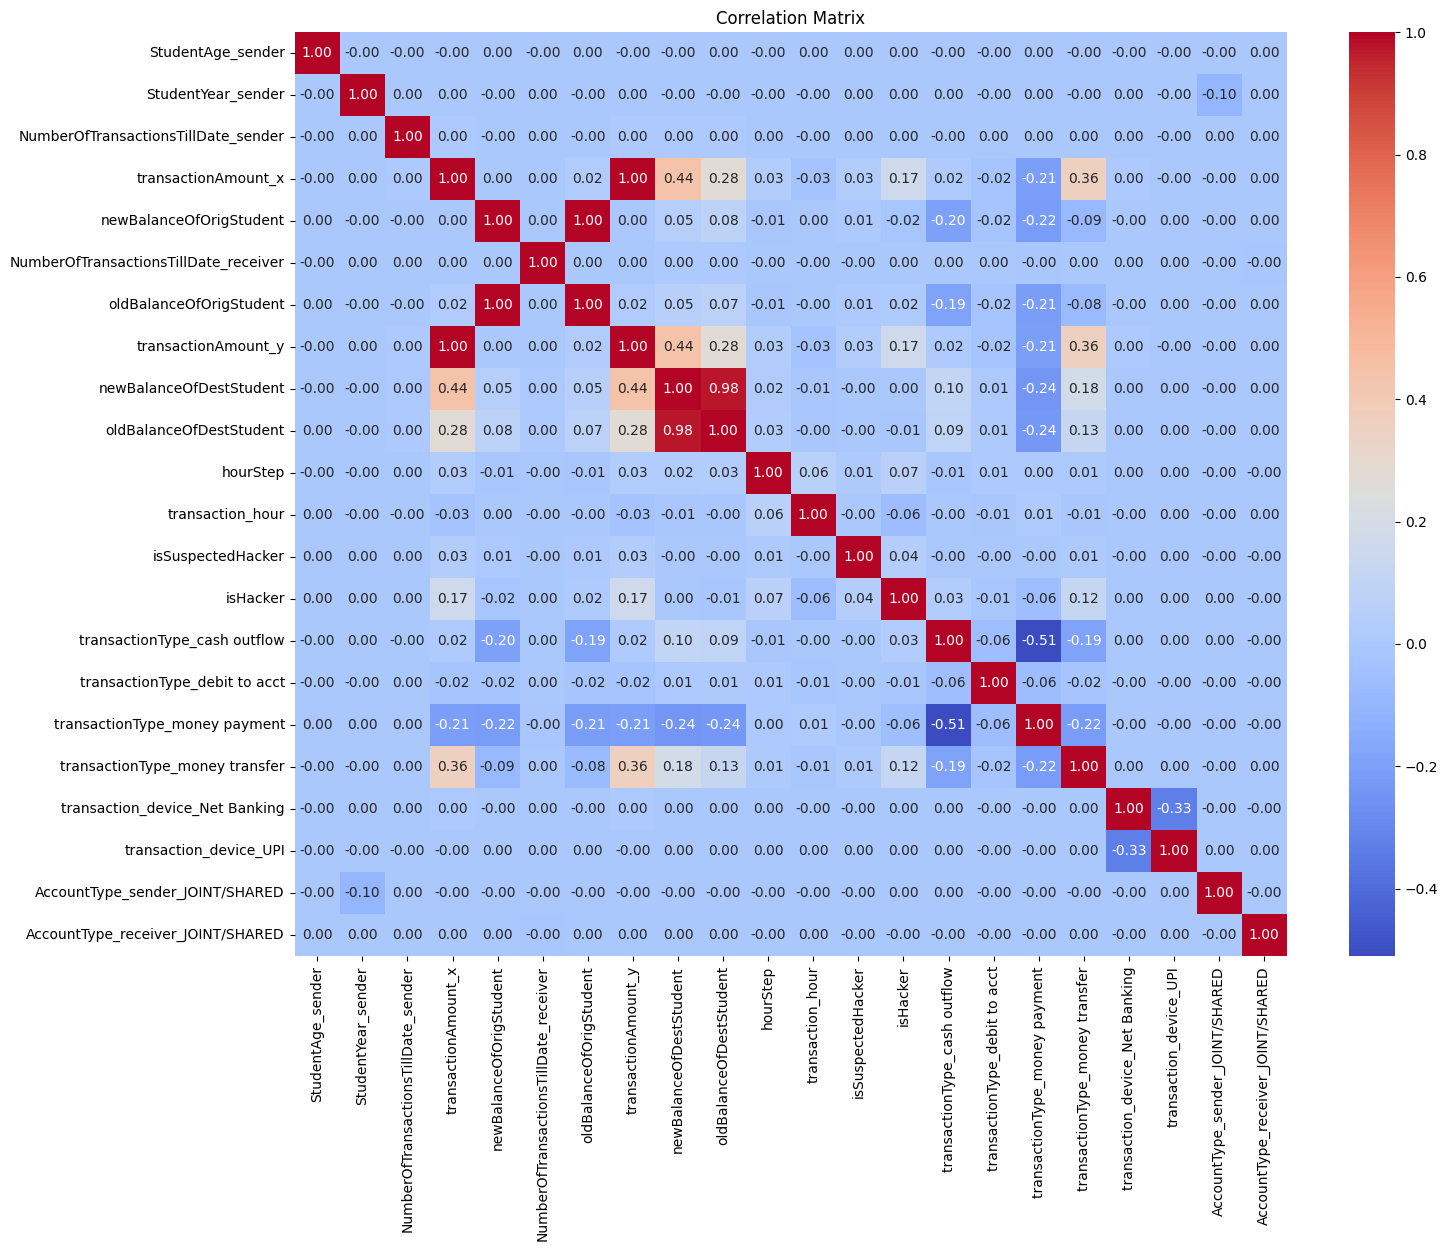

In [69]:
# Select numerical features for correlation plot
numerical_features = ['StudentAge_sender', 'StudentYear_sender', 'NumberOfTransactionsTillDate_sender',
                     'transactionAmount_x', 'newBalanceOfOrigStudent','NumberOfTransactionsTillDate_receiver',
                      'oldBalanceOfOrigStudent', 'transactionAmount_y', 'newBalanceOfDestStudent',
                      'oldBalanceOfDestStudent', 'hourStep', 'transaction_hour', 'isSuspectedHacker','isHacker','transactionType_cash outflow','transactionType_debit to acct'
                      ,'transactionType_money payment','transactionType_money transfer','transaction_device_Net Banking','transaction_device_UPI','AccountType_sender_JOINT/SHARED','AccountType_receiver_JOINT/SHARED']

# Compute correlation matrix
corr_matrix = processed_data[numerical_features].corr()


# Create correlation plot
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [80]:
!pip3 install plotly

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 30.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


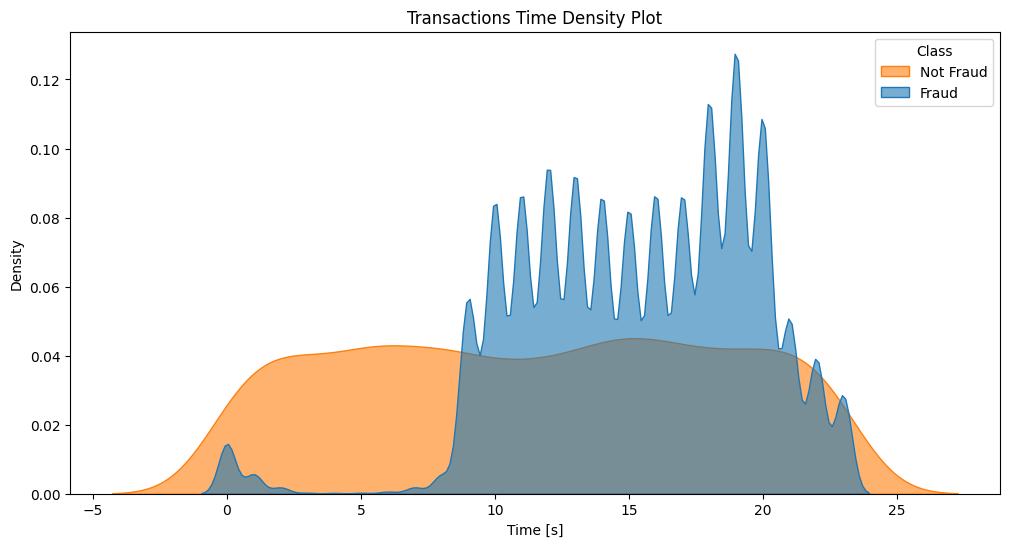

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
class_0 = processed_data.loc[processed_data['isHacker'] == 0]["transaction_hour"]
class_1 = processed_data.loc[processed_data['isHacker'] == 1]["transaction_hour"]

# Create a DataFrame for seaborn
data = pd.DataFrame({
    'transaction_hour': pd.concat([class_0, class_1]),
    'isHacker': ['Not Fraud'] * len(class_0) + ['Fraud'] * len(class_1)
})

# Plot the density plot using seaborn
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='transaction_hour', hue='isHacker', fill=True, common_norm=False, palette=['#1f77b4', '#ff7f0e'], alpha=0.6)
plt.title('Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.ylabel('Density')
plt.legend(title='Class', labels=['Not Fraud', 'Fraud'])
plt.show()


In [70]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import xgboost as xgb


In [71]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier
RANDOM_STATE = 2018

In [72]:
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split


In [73]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(processed_data, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [74]:

target = 'isHacker'
# Select numerical features for correlation plot
predictors = ['StudentAge_sender','StudentAge_receiver', 'StudentYear_sender','StudentYear_receiver', 'NumberOfTransactionsTillDate_sender',
                     'transactionAmount_x', 'newBalanceOfOrigStudent','NumberOfTransactionsTillDate_receiver',
                      'oldBalanceOfOrigStudent', 'transactionAmount_y', 'newBalanceOfDestStudent',
                      'oldBalanceOfDestStudent', 'hourStep', 'transaction_hour', 'isSuspectedHacker','transactionType_cash outflow',
       'transactionType_debit to acct', 'transactionType_money payment',
       'transactionType_money transfer', 'transaction_device_Check',
       'transaction_device_Net Banking', 'transaction_device_UPI',
       'AccountType_sender_JOINT/SHARED', 'AccountType_receiver_JOINT/SHARED']


clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [75]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [76]:
preds = clf.predict(valid_df[predictors])

/var/folders/7y/xsztmydx0ps9ngnbr1tfdsq00000gn/T/ipykernel_86183/3992975389.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


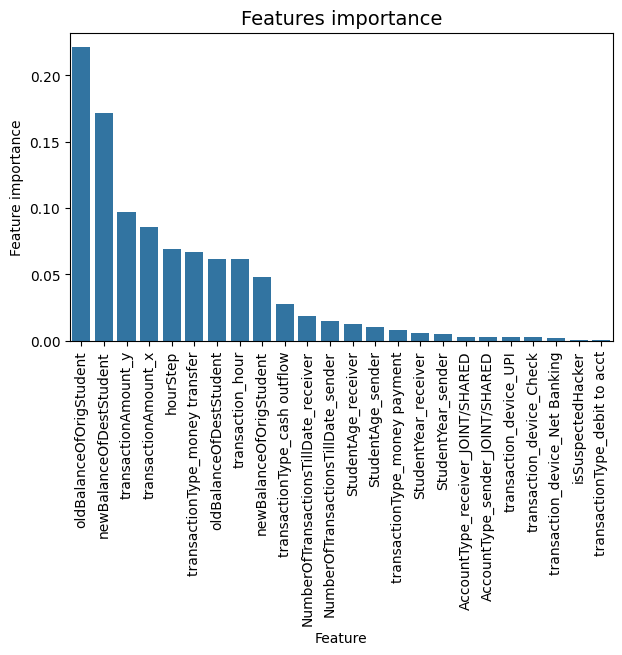

In [77]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

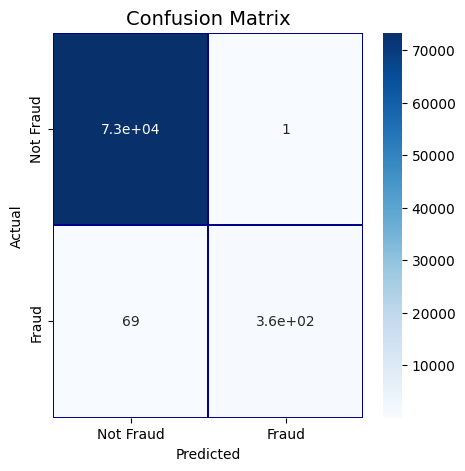

In [41]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [78]:
roc_auc_score(valid_df[target].values, preds)

0.9188167086876766

In [79]:
from sklearn.metrics import roc_auc_score, average_precision_score
# Calculate AUPRC
auprc = average_precision_score(valid_df[target].values, preds)
print(f'AUPRC: {auprc:.4f}')

AUPRC: 0.8362


In [80]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [81]:
MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result


In [82]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)


/opt/homebrew/lib/python3.11/site-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [06:58:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.71813	valid-auc:0.74708
[50]	train-auc:0.93200	valid-auc:0.93973
[100]	train-auc:0.99080	valid-auc:0.99268
[150]	train-auc:0.99474	valid-auc:0.99638
[200]	train-auc:0.99667	valid-auc:0.99819
[250]	train-auc:0.99729	valid-auc:0.99889
[300]	train-auc:0.99760	valid-auc:0.99912
[350]	train-auc:0.99772	valid-auc:0.99930
[400]	train-auc:0.99776	valid-auc:0.99942
[450]	train-auc:0.99782	valid-auc:0.99951
[500]	train-auc:0.99773	valid-auc:0.99957
[550]	train-auc:0.99764	valid-auc:0.99962
[600]	train-auc:0.99762	valid-auc:0.99965
[650]	train-auc:0.99758	valid-auc:0.99969
[700]	train-auc:0.99757	valid-auc:0.99971
[750]	train-auc:0.99757	valid-auc:0.99973
[800]	train-auc:0.99757	valid-auc:0.99975
[850]	train-auc:0.99758	valid-auc:0.99976
[900]	train-auc:0.99761	valid-auc:0.99977
[950]	train-auc:0.99763	valid-auc:0.99978
[999]	train-auc:0.99767	valid-auc:0.99979


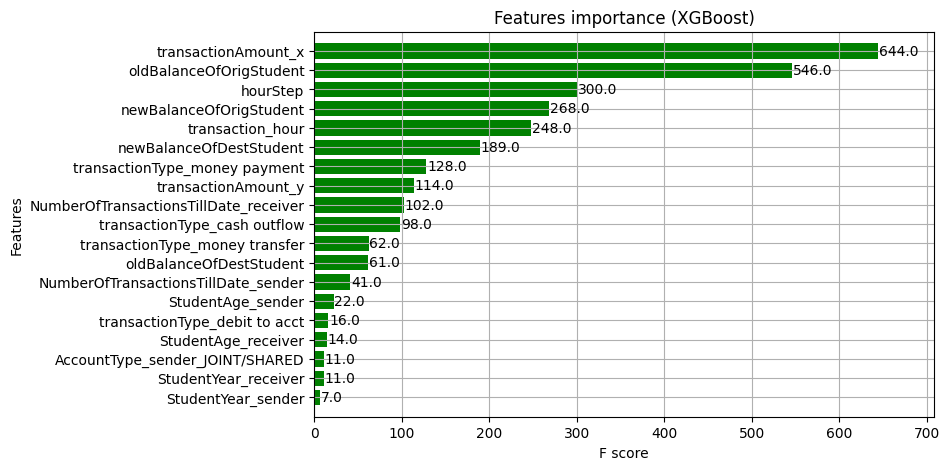

In [83]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [84]:
preds = model.predict(dtest)

In [85]:
roc_auc_score(test_df[target].values, preds)

0.9984407780797853

In [86]:
 #Calculate AUPRC
auprc = average_precision_score(test_df[target].values, preds)
print(f'AUPRC: {auprc:.4f}')

AUPRC: 0.9744


In [49]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)


In [50]:
clf.fit(train_df[predictors], train_df[target].values,verbose=True)


0:	total: 152ms	remaining: 1m 15s
50:	total: 6.43s	remaining: 56.6s
100:	total: 11.4s	remaining: 45.2s
150:	total: 17.1s	remaining: 39.6s
200:	total: 22.1s	remaining: 32.9s
250:	total: 27.3s	remaining: 27.1s
300:	total: 32.4s	remaining: 21.4s
350:	total: 37.4s	remaining: 15.9s
400:	total: 42.3s	remaining: 10.4s
450:	total: 47.6s	remaining: 5.17s
499:	total: 52.4s	remaining: 0us


In [51]:
preds = clf.predict(valid_df[predictors])

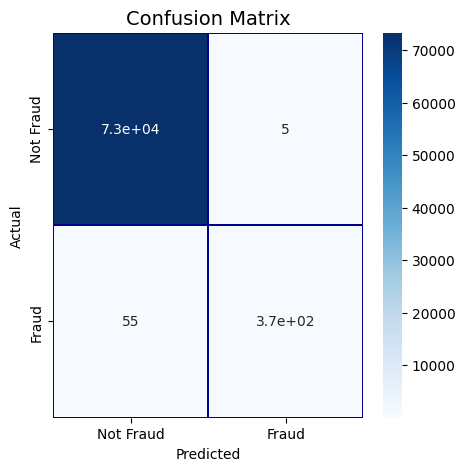

In [52]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [53]:
roc_auc_score(valid_df[target].values, preds)

0.9352600140266184